In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.integrate import solve_ivp

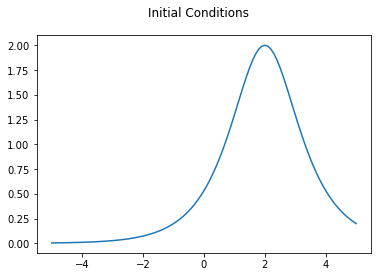

In [69]:
''' ==== u_t = u_xx ====
'''
L = 10  # [-5, 5]
N = 100+1
dx = L / (N-1)
x = np.arange(-L/2, L/2 + dx, dx)

assert len(x) == N

# frequencies
kappa = 2 * np.pi * np.fft.fftfreq(N, dx)

# initial conditions
u0 = 4 / (np.exp(x-2) + np.exp(2-x))

# u0 = np.roll(u0, 25)

plt.plot(x, u0)
plt.suptitle('Initial Conditions')
plt.show()

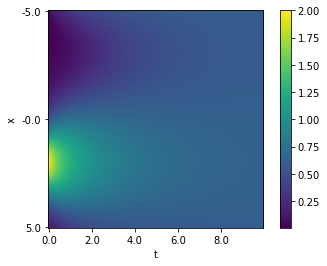

In [70]:
def rhs(t, uhat):
    return - np.power(kappa, 2) * uhat

# simulation setup
dt = .1
T = 10
t = np.arange(0,T,dt)

u0hat = np.fft.fft(u0)
ivp = solve_ivp(rhs, (0,T), u0hat, method='RK45', t_eval=t)
uhat = ivp.y.T

u = np.zeros_like(uhat)
for t_i in range(len(t)):
    u[t_i,:] = np.fft.ifft(uhat[t_i,:])

plt.imshow(u.real.T)
plt.colorbar()

plt.xticks(np.arange(u.shape[0])[::20], t[::20])
plt.yticks(np.arange(u.shape[1])[::50], [f"{x_i:.1f}" for x_i in x[::50]])

plt.ylabel('x')
plt.xlabel('t')

plt.show()